In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.DataFrame({'x1':[2,-2,1,2,-2,0,0,2],
                    'x2':[2,-1,2,1,2,2,-1,-1],
                    'class':['A','A','A','A','B','B','B','B']})

In [7]:
data

,class,x1,x2
0,A,2,2
1,A,-2,-1
2,A,1,2
3,A,2,1
4,B,-2,2
5,B,0,2
6,B,0,-1
7,B,2,-1


###  Part (a)

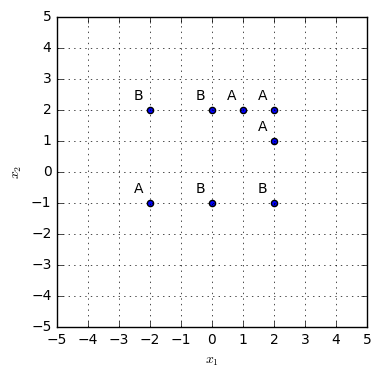

In [8]:
fig = plt.figure()
ax = fig.gca()
ax.set_aspect('equal', adjustable='box')
ax.set_xticks(np.arange(-5,6,1))
ax.set_yticks(np.arange(-5,6,1))
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')

plt.scatter(data['x1'], data['x2'])

for index in range(len(data)):
    row = data.loc[index]
    plt.annotate(row['class'], xy=(row['x1'],row['x2']), xytext = (-5, 5), textcoords = 'offset points', ha = 'right', va = 'bottom')

plt.grid()

# plt.plot([-5,5],[3.75,-1.25], color='r')
# plt.plot([-5,5],[5,0], linestyle='--', color='g')
# plt.plot([-5,5],[2.5,-2.5], linestyle='--', color='g')

plt.xlim([-5,5])
plt.ylim([-5,5])


plt.savefig('part_a.png')
plt.show()

In [9]:
featureSpace = pd.concat([data['x1'].multiply(data['x1']),data['x1'].multiply(data['x2']),data['class']], axis=1)
featureSpace.columns=['x1^2','x1.x2', 'class']

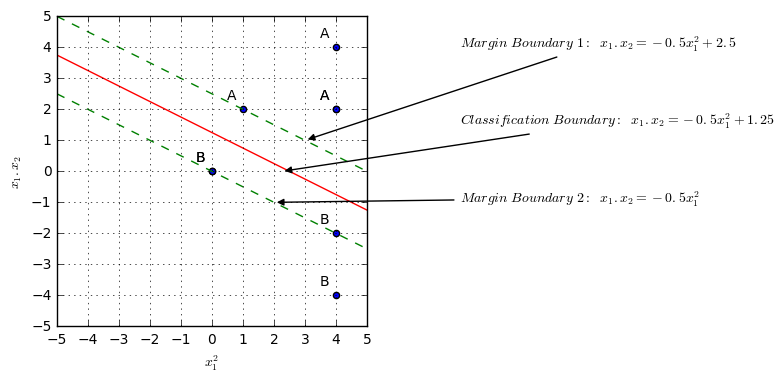

In [10]:
fig = plt.figure()
ax = fig.gca()
ax.set_aspect('equal', adjustable='box')
ax.set_xticks(np.arange(-5,6,1))
ax.set_yticks(np.arange(-5,6,1))

ax.set_xlabel(r'$x_1^2$')
ax.set_ylabel(r'$x_1.x_2$')

plt.scatter(featureSpace['x1^2'], featureSpace['x1.x2'])

for index in range(len(featureSpace)):
    row = featureSpace.loc[index]
    plt.annotate(row['class'], xy=(row['x1^2'],row['x1.x2']), xytext = (-5, 5), textcoords = 'offset points', ha = 'right', va = 'bottom')


plt.grid()
# plt.plot([0,1],[0,2], linestyle='dotted', color='black')
plt.plot([-5,5],[3.75,-1.25], color='r')
plt.plot([-5,5],[5,0], linestyle='--', color='g')
plt.plot([-5,5],[2.5,-2.5], linestyle='--', color='g')
# plt.plot([0,4],[0,-2])

plt.xlim([-5,5])
plt.ylim([-5,5])

ax.annotate(r'$Classification\ Boundary:\ \ x_1.x_2 = -0.5 x_1^2 + 1.25$', xy=(2.25,0), xytext=(8, 1.5),
            arrowprops=dict(arrowstyle="-|>",facecolor='black'))

ax.annotate(r'$Margin\ Boundary\ 1:\ \ x_1.x_2 = -0.5 x_1^2 + 2.5$', xy=(3,1), xytext=(8, 4),
            arrowprops=dict(arrowstyle="-|>",facecolor='black'))

ax.annotate(r'$Margin\ Boundary\ 2:\ \ x_1.x_2 = -0.5 x_1^2$', xy=(2,-1), xytext=(8, -1),
            arrowprops=dict(arrowstyle="-|>",facecolor='black'))



plt.savefig('part_b_c.png', bbox_inches="tight")

plt.show()

In [7]:
inputSpaceVectorsIndex = [2,5,6, 7]

In [8]:
inputSpaceSeparator = {'x1':[],'x2':[]}
for x in np.arange(-5,6,0.1):
    inputSpaceSeparator['x1'].append(x)
    inputSpaceSeparator['x2'].append((-0.5*x)+(1.25/x))

inputSpaceSVA = {'x1':[],'x2':[]}
for x in np.arange(-5,6,0.1):
    inputSpaceSVA['x1'].append(x)
    inputSpaceSVA['x2'].append((-0.5*x)+(2.5/x))

inputSpaceSVB = {'x1':[],'x2':[]}
for x in np.arange(-5,6,0.1):
    inputSpaceSVB['x1'].append(x)
    inputSpaceSVB['x2'].append(-0.5*x)

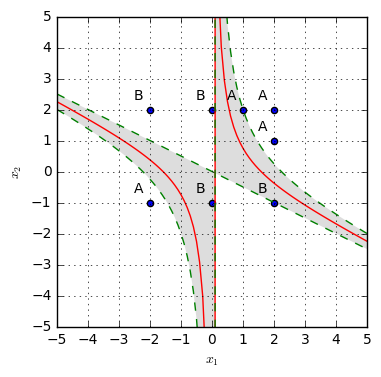

In [29]:
fig, sub = plt.subplots()

ax = fig.gca()
ax.set_aspect('equal', adjustable='box')
ax.set_xticks(np.arange(-5,6,1))
ax.set_yticks(np.arange(-5,6,1))

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')

for index in range(len(data)):
    row = data.loc[index]
    plt.annotate(row['class'], xy=(row['x1'],row['x2']), xytext = (-5, 5), textcoords = 'offset points', ha = 'right', va = 'bottom')

plt.grid()

plt.plot(inputSpaceSeparator['x1'],inputSpaceSeparator['x2'], color='r')
plt.plot(inputSpaceSVA['x1'],inputSpaceSVA['x2'], linestyle='--', color='g')
plt.plot(inputSpaceSVB['x1'],inputSpaceSVB['x2'], linestyle='--', color='g')


shadingColor='#DDDDDD'
x = pd.Series(inputSpaceSeparator['x1'])
y1 = pd.Series(inputSpaceSeparator['x2'])
y2 = pd.Series(inputSpaceSVA['x2'])
sub.fill_between(x, y1, y2, where=y2 >= y1, facecolor=shadingColor, interpolate=True, linewidth=0.0)
sub.fill_between(x, y1, y2, where=y2 < y1, facecolor=shadingColor, interpolate=True, linewidth=0.0)

x = pd.Series(inputSpaceSeparator['x1'])
y1 = pd.Series(inputSpaceSeparator['x2'])
y2 = pd.Series(inputSpaceSVB['x2'])
sub.fill_between(x, y1, y2, where=y2 >= y1, facecolor=shadingColor, interpolate=True, linewidth=0.0)
sub.fill_between(x, y1, y2, where=y2 < y1, facecolor=shadingColor, interpolate=True, linewidth=0.0)

plt.scatter(data['x1'], data['x2'])

plt.xlim([-5,5])
plt.ylim([-5,5])

plt.savefig('part_e_f.png')
plt.show()

In [11]:
featureSpace


,x1^2,x1.x2,class
0,4,4,A
1,4,2,A
2,1,2,A
3,4,2,A
4,4,-4,B
5,0,0,B
6,0,0,B
7,4,-2,B
